In [1]:
import sqc
import numpy as np
from exercises import qft
import matplotlib.pyplot as plt

# Phase estimation

In [10]:
def phaseEstimate(op,xbits,cuj):
    N=len(xbits)
    for i in reversed(range(N)):
        op=op.H(xbits[i])
        op=cuj(xbits[i],2**i,op)
    op=qft(op,mask=xbits,inverse=True)
    return op

# Simple U = {{ Exp[I 2pi phi], 0}, { 0, Exp[-I 2pi phi] }}, always acting on LSB
def CU(i,k,op,phi): # i is control qubit, k is power
    return op.Rz(0,2.*np.pi*phi*k).CNOT(i,0).Rz(0,-2.*np.pi*phi*k).CNOT(i,0)

def measure(Nxbits,Nmeasure,cuj):
    Nbits=Nxbits+1
    xbits=list(range(1,Nbits))
    
    st0=sqc.state(Nbits,basis=["|%g>|%d>" % ( (i//2) / 2**Nxbits,i%2) for i in range(2**Nbits)])
    print("Initial = 0\n",st0)

    st1=phaseEstimate(sqc.operator(Nbits).H(0),xbits,cuj)*st0

    if Nmeasure == 0:
        print("State after phaseEstimate\n",st1)
    else:
        res=sqc.sample(st1,Nmeasure,mask=xbits)
        
        plt.bar([ (x//2) / 2**Nxbits for x in res.keys() ],res.values(),width=0.01)
        plt.xlabel('phi')
        plt.xlim(0,1)
        plt.ylabel('count')
        plt.show()
        
    


In [11]:
measure(4,0,lambda i,k,op: CU(i,k,op,0.25))

Initial = 0
    1 * |0>|0>
State after phaseEstimate
    0.707107 * |0.25>|1>
 + 0.707107 * |0.75>|0>


Initial = 0
    1 * |0>|0>


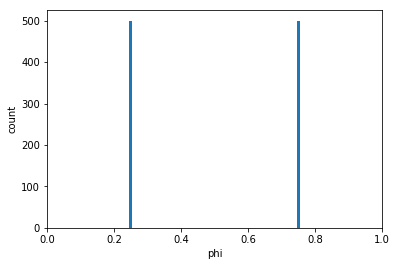

In [12]:
measure(4,1000,lambda i,k,op: CU(i,k,op,0.25))

Initial = 0
    1 * |0>|0>


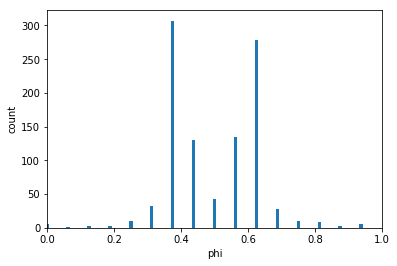

In [13]:
measure(4,1000,lambda i,k,op: CU(i,k,op,0.4))

Initial = 0
    1 * |0>|0>


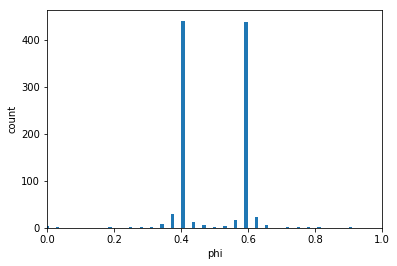

In [14]:
measure(5,1000,lambda i,k,op: CU(i,k,op,0.4))

Initial = 0
    1 * |0>|0>


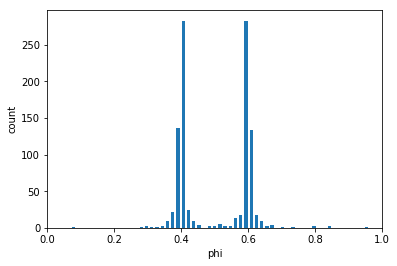

In [15]:
measure(6,1000,lambda i,k,op: CU(i,k,op,0.4))

Initial = 0
    1 * |0>|0>


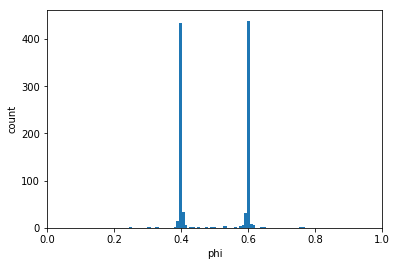

In [16]:
measure(7,1000,lambda i,k,op: CU(i,k,op,0.4))

# More general one-qubit matrices

In [18]:
def CU2(i,k,op,phi,theta): # i is control qubit, k is power
    return op.Rz(0,np.pi*(phi-theta)*k).CNOT(i,0).Rz(0,np.pi*(theta-phi)*k).CNOT(i,0).Rz(i,np.pi*(theta+phi)*k)



Initial = 0
    1 * |0>|0>


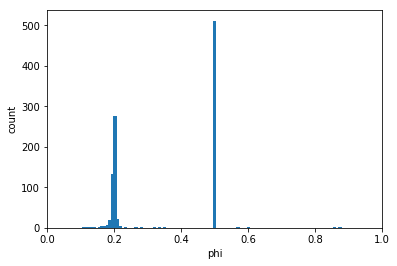

In [19]:
measure(7,1000,lambda i,k,op: CU2(i,k,op,0.2,0.5))

In [20]:
def CU2H(i,k,op,phi,theta): # i is control qubit, k is power
    return op.H(0).Rz(0,np.pi*(phi-theta)*k).CNOT(i,0).Rz(0,np.pi*(theta-phi)*k).CNOT(i,0).Rz(i,np.pi*(theta+phi)*k).H(0)



Initial = 0
    1 * |0>|0>


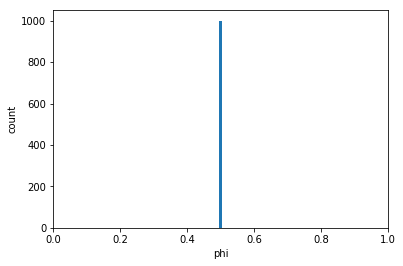

In [21]:
measure(7,1000,lambda i,k,op: CU2H(i,k,op,0.2,0.5))